## 2 - Code zur Vorlesung Data Engineering

Der folgende Code wird in der zweiten Vorlesungseinheit Data Engineering gezeigt. Zuerst müssen wir in unserem virtuellen Environment einige Bibliotheken installieren (siehe hierzu: https://www.tensorflow.org/install/pip). Dies funktioniert direkt aus diesem Jupyter Notebook mit Ausführen des folgenden Codes (sofern VSCode ein Popup bringt, wählen Sie ihr venv aus):

In [24]:
pip install tensorflow numpy matplotlib scipy pandas

Note: you may need to restart the kernel to use updated packages.


Anschließend verifizieren wir, dass die Bibliothek Tensorflow richtig installiert wurde:

In [2]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-586.0614, shape=(), dtype=float32)


Nun müssen wir die Bibliotheken noch importieren:

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import json

### Beispiel Daten Analysieren

Im Ordner data des Repositories befindet sich ein Rohdatensatz (```2-oura_daily-sleep.json```), welcher Schlafdaten beinhaltet. Wir laden diesen Datensatz mit Pandas, einer sehr gute Bibliothek zur Datenbearbeitung in Python:

In [34]:
with open(os.path.join('data', '2-oura_daily-sleep.json')) as f:
    oura_data = json.load(f)

df = pd.json_normalize(oura_data, record_path=['daily_sleep'])

Mit folgendem Code können wir uns die ersten 5 Zeilen des Datensatzes anschauen:

In [33]:
df.head()

,day,score,contributors.deep_sleep,contributors.efficiency,contributors.latency,contributors.rem_sleep,contributors.restfulness,contributors.timing,contributors.total_sleep
0,2025-01-03,76,84,83,51,58,80,98,75
1,2025-01-04,63,80,74,12,51,69,84,65
2,2025-01-05,59,64,74,37,50,53,78,60
3,2025-01-06,73,95,83,89,56,66,53,74
4,2025-01-07,45,40,55,18,37,23,90,51


Die ersten wichtigen Erkenntnisse bekommen wir über folgende Funktion der Bibliothek Pandas:

In [37]:
df.describe()

,score,contributors.deep_sleep,contributors.efficiency,contributors.latency,contributors.rem_sleep,contributors.restfulness,contributors.timing,contributors.total_sleep
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,67.200000,68.266667,79.266667,57.533333,58.733333,64.133333,83.933333,65.066667
std,9.674709,20.970955,11.744097,27.026090,16.355282,17.439146,12.914370,9.384384
min,45.000000,26.000000,55.000000,12.000000,33.000000,23.000000,53.000000,47.000000
25%,62.500000,55.000000,74.000000,38.500000,50.500000,59.500000,76.000000,61.500000
50%,66.000000,69.000000,79.000000,64.000000,58.000000,69.000000,84.000000,63.000000
75%,74.500000,82.000000,89.000000,72.500000,68.000000,71.000000,93.500000,72.500000
max,81.000000,95.000000,95.000000,99.000000,86.000000,92.000000,100.000000,79.000000


Um alle Werte eines Features auszugeben, können wir mit dem [] Operator arbeiten:

In [39]:
df['day']

0     2025-01-03
1     2025-01-04
2     2025-01-05
3     2025-01-06
4     2025-01-07
5     2025-01-08
6     2025-01-09
7     2025-01-13
8     2025-01-14
9     2025-01-15
10    2025-01-16
11    2025-01-17
12    2025-01-18
13    2025-01-19
14    2025-01-20
Name: day, dtype: object

In [41]:
df['contributors.rem_sleep']

0     58
1     51
2     50
3     56
4     37
5     63
6     73
7     33
8     63
9     53
10    36
11    65
12    86
13    71
14    86
Name: contributors.rem_sleep, dtype: int64

Darauf können wir alle möglichen (mathematischen) Operatoren anwenden und auch neue Features erstellen:

In [43]:
max_score = df['contributors.rem_sleep'].max()
print("Maximaler REM Schlaf-Score:", max_score)

df['I_am_a_new_feature'] = (df['contributors.efficiency'] + df['contributors.deep_sleep']) / 2
df['deep_sleep_classification'] = pd.cut(df['contributors.deep_sleep'], bins=[0, 20, 40, 60, 80, 100], labels=['very low', 'low', 'medium', 'high', 'very high'])

df.head()

Maximaler REM Schlaf-Score: 86


,day,score,contributors.deep_sleep,contributors.efficiency,contributors.latency,contributors.rem_sleep,contributors.restfulness,contributors.timing,contributors.total_sleep,I_am_a_new_feature,deep_sleep_classification
0,2025-01-03,76,84,83,51,58,80,98,75,83.5,very high
1,2025-01-04,63,80,74,12,51,69,84,65,77.0,high
2,2025-01-05,59,64,74,37,50,53,78,60,69.0,high
3,2025-01-06,73,95,83,89,56,66,53,74,89.0,very high
4,2025-01-07,45,40,55,18,37,23,90,51,47.5,low


### Beispiel Datenaugmentierung

Wenn Sie beispielsweise ein echtes Bild einer Schildkröte haben, können Sie es spiegeln, um ein neues Bild derselben Schildkröte zu erstellen. In Python können Sie die Klasse ImageDataGenerator nutzen, um Bilder zu augmentieren.

Zuerst zeigen wir das zu augmentierende Bild an (```imgs/2-turtle.JPG```, Sven Winkelmann, CC0)

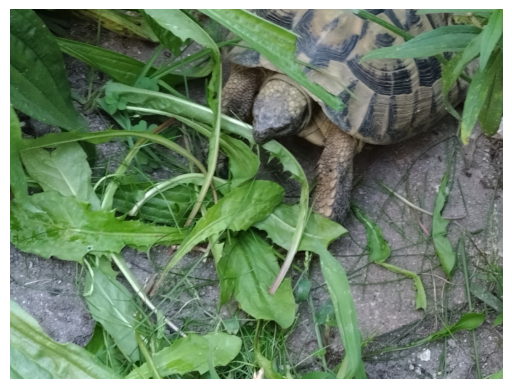

In [14]:
turtle_img_path = os.path.join("imgs", "2-turtle.JPG") # um für verschiedene Betriebssysteme kompatibel zu sein, verwenden wir os.path.join
turtle_img = plt.imread(turtle_img_path)
plt.imshow(turtle_img)
plt.axis('off')
plt.show()

Anschließend erzeugen wir 9 Bilder basierend auf unserem realen Bild und zeigen diese an:

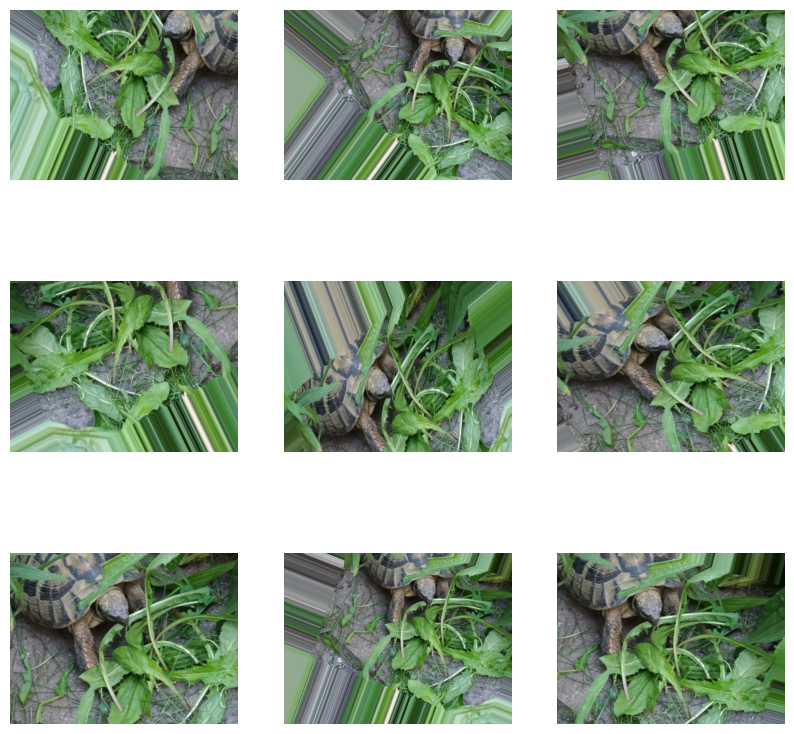

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 1. Bild laden
img = load_img(turtle_img_path)
x = img_to_array(img)  # Bild in ein NumPy-Array umwandeln
x = x.reshape((1,) + x.shape)  # Form für den Generator anpassen

# 2. ImageDataGenerator mit Augmentierungsoptionen erstellen
datagen = ImageDataGenerator(
    rotation_range=40,       # Zufällige Rotation zwischen -40 und +40 Grad
    width_shift_range=0.2,   # Zufällige horizontale Verschiebung
    height_shift_range=0.2,  # Zufällige vertikale Verschiebung
    shear_range=0.2,         # Zufällige Scherung
    zoom_range=0.2,          # Zufälliges Zoomen
    horizontal_flip=True,    # Zufälliges horizontales Spiegeln
    fill_mode='nearest'      # Strategie zum Füllen neu entstandener Pixel
    #fill_mode='constant'      # Strategie zum Füllen neu entstandener Pixel
)

# 3. Augmentierte Bilder generieren und anzeigen
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(3, 3, i+1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis('off')
    if i == 8:  # 9 Bilder anzeigen (inkl. Original)
        break
plt.show()


Die Artefakte am Rand kommen bei Auffüllen des originalen Bilds zustande. Beim Training eines Modells zur Bilderkennung ist es wichtig, immer dieselbe Auflösung (Pixel) eines Bildes zu haben. Deswegen füllt uns der ```ImageDataGenerator``` die Randbereiche mit den nächsten Pixeln auf. Sie können das Verhalten zum Füllen neu entstandener Pixel über das Attribut ```fill_mode='nearest'``` steuern.  